In [624]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pylab

### Объединение данных за все года

In [625]:
df19 = pd.read_csv('2019.csv', sep = ';').drop(['date', 'time'], axis = 1)
df20 = pd.read_csv('2020.csv', sep = ';').drop(['date', 'time'], axis = 1)
df21 = pd.read_csv('2021.csv', sep = ';').drop(['date', 'time'], axis = 1)
df22 = pd.read_csv('2022.csv', sep = ';').drop(['Date'], axis = 1)
df23 = pd.read_csv('2023.csv', sep = ';').drop(['Date'], axis = 1)

In [626]:
pd.read_csv('2022.csv', sep = ';')

,Date,4LFTX,ABSV_mb_700,ABSV_mb_750,ABSV_mb_800,ABSV_mb_850,ABSV_mb_900,ABSV_mb_925,ABSV_mb_950,ABSV_mb_975,...,VVEL_mb_900,VVEL_mb_925,VVEL_mb_950,VVEL_mb_975,VVEL_mb_1000,VVEL_sig_0995,VWSH_pv_p2,VWSH_tropo,WEASD,WILT
0,2022-01-01 00:00:00,11.114507,0.000087,0.000096,0.000094,0.000091,0.000077,2.391077e-05,0.000030,-0.000017,...,-0.093334,0.201806,0.433042,0.426613,0.227128,0.368863,0.008472,0.009858,22.600001,0.1347
1,2022-01-01 06:00:00,12.354716,0.000128,0.000145,0.000150,0.000100,0.000058,1.178101e-06,-0.000014,-0.000049,...,0.195263,0.480979,0.616451,0.473107,0.270603,0.426023,-0.000503,-0.000415,22.512002,0.1347
2,2022-01-01 12:00:00,10.490922,0.000106,0.000103,0.000141,0.000105,0.000073,2.919421e-05,-0.000061,-0.000106,...,-0.096215,0.112395,0.345983,0.352787,0.225725,0.355133,0.003932,0.002757,22.424000,0.1347
3,2022-01-01 18:00:00,13.461447,0.000116,0.000110,0.000114,0.000119,0.000078,2.583005e-07,-0.000084,-0.000048,...,-0.139888,0.015877,0.191873,0.234057,0.164781,0.254855,0.000626,-0.002838,22.400001,0.1347
4,2022-01-02 00:00:00,14.757167,0.000111,0.000078,0.000059,0.000074,0.000079,6.750281e-05,0.000022,0.000085,...,0.051395,0.234018,0.285536,0.211367,0.160459,0.242071,-0.003456,-0.003196,22.376000,0.1347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2022-12-30 18:00:00,13.298157,0.000052,0.000134,0.000158,0.000148,0.000112,1.330507e-04,0.000203,0.000251,...,0.021479,0.060261,0.010256,-0.068244,0.047756,0.048130,-0.007093,-0.007399,10.860000,0.1347
1456,2022-12-31 00:00:00,12.764394,0.000059,0.000061,0.000085,0.000136,0.000135,1.817350e-04,0.000277,0.000349,...,0.117883,0.166782,0.087170,-0.054209,-0.008613,-0.008969,0.003524,0.003932,10.864000,0.1347
1457,2022-12-31 06:00:00,11.011007,0.000045,0.000059,0.000083,0.000118,0.000162,2.162775e-04,0.000299,0.000330,...,0.107733,0.104332,0.013027,-0.051685,-0.037154,-0.028944,0.005709,-0.003180,10.848000,0.1347
1458,2022-12-31 12:00:00,10.885651,0.000085,0.000097,0.000114,0.000127,0.000135,2.009472e-04,0.000312,0.000415,...,0.311067,0.265425,0.087469,-0.043865,0.012635,0.019719,-0.001784,-0.002742,10.836001,0.1347


In [627]:
df = pd.concat([df19, df20, df21, df22, df23], join = 'inner').reset_index(drop = True)
df

,4LFTX,ABSV_mb_700,ABSV_mb_750,ABSV_mb_800,ABSV_mb_850,ABSV_mb_900,ABSV_mb_925,ABSV_mb_950,ABSV_mb_975,ABSV_mb_1000,...,VVEL_mb_850,VVEL_mb_900,VVEL_mb_925,VVEL_mb_950,VVEL_mb_975,VVEL_mb_1000,VVEL_sig_0995,VWSH_pv_p2,VWSH_tropo,WEASD
0,15.359048,0.000128,0.000119,0.000097,0.000088,0.000117,0.000131,0.000095,0.000073,0.000122,...,-0.178694,-0.308232,-0.316732,-0.187732,-0.020732,0.020768,0.032731,-0.004168,-0.004194,27.000
1,15.279560,0.000126,0.000121,0.000120,0.000118,0.000123,0.000130,0.000104,0.000090,0.000132,...,-0.050335,-0.121799,-0.140606,-0.066039,0.021961,0.010961,0.017717,-0.004137,-0.004186,27.000
2,15.515242,0.000106,0.000110,0.000119,0.000118,0.000125,0.000118,0.000066,0.000077,0.000119,...,-0.260287,-0.305086,-0.277637,-0.151637,-0.016137,0.037363,0.044195,-0.003280,-0.003300,27.000
3,15.861166,0.000073,0.000103,0.000098,0.000080,0.000113,0.000115,0.000007,0.000003,0.000107,...,-0.042648,-0.198450,-0.182450,0.038050,0.221050,0.200050,0.213562,-0.004273,-0.004013,27.000
4,15.329791,0.000110,0.000147,0.000123,0.000135,0.000131,0.000100,-0.000058,-0.000060,0.000095,...,-0.085195,-0.195376,-0.184167,0.034479,0.260893,0.251393,0.264997,-0.001644,-0.001400,28.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6182,5.819620,0.000086,0.000126,0.000119,0.000079,0.000078,0.000047,0.000039,0.000058,0.000102,...,0.287576,0.709404,0.905953,0.895344,0.535686,0.458686,0.769606,0.009501,0.009360,2.752
6183,3.848865,0.000120,0.000117,0.000110,0.000075,-0.000019,0.000026,0.000026,0.000053,0.000095,...,0.249867,0.664075,0.807416,0.835384,0.531365,0.470701,0.773813,-0.000707,0.005326,2.400
6184,5.852510,0.000100,0.000148,0.000131,0.000035,0.000042,0.000033,0.000019,0.000077,0.000086,...,0.668853,1.186500,1.167427,0.993951,0.535734,0.483486,0.806588,-0.005403,-0.005139,4.416
6185,5.485124,0.000239,0.000119,0.000133,0.000064,0.000029,0.000044,-0.000010,0.000014,0.000060,...,-0.113556,0.266327,0.447901,0.593516,0.457966,0.425466,0.623436,-0.002018,-0.001947,2.776


In [628]:
X = df.values

### Стандартизация признаков

In [629]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [630]:
X_std

array([[ 1.27368963,  0.1020782 , -0.06591498, ..., -0.59536633,
        -0.35729667,  1.77099962],
       [ 1.2593546 ,  0.07069559, -0.03479147, ..., -0.58927983,
        -0.35578323,  1.77099962],
       [ 1.3018579 , -0.29120162, -0.23581527, ..., -0.42250781,
        -0.19267579,  1.77099962],
       ...,
       [-0.44073386, -0.39603712,  0.44523703, ..., -0.83580764,
        -0.53115318, -0.3475595 ],
       [-0.50698874,  2.0981903 , -0.06772131, ..., -0.17699111,
         0.05632604, -0.50140458],
       [-0.17655261, -0.05967594,  0.80198473, ...,  0.31415446,
         0.62344821, -0.5486838 ]])

### Вычисление ковариационной матрицы, а также собственных векторов и собственных значений с помощью linalg.eig

In [631]:
cov_mat = np.cov(X_std.T)
cov_mat

array([[ 1.00016166,  0.08939655,  0.077629  , ..., -0.0066771 ,
        -0.02002985,  0.55783862],
       [ 0.08939655,  1.00016166,  0.73940681, ...,  0.0057857 ,
        -0.04480354,  0.01302656],
       [ 0.077629  ,  0.73940681,  1.00016166, ...,  0.00991658,
        -0.03363719,  0.01645581],
       ...,
       [-0.0066771 ,  0.0057857 ,  0.00991658, ...,  1.00016166,
         0.50992405,  0.02492461],
       [-0.02002985, -0.04480354, -0.03363719, ...,  0.50992405,
         1.00016166,  0.03328011],
       [ 0.55783862,  0.01302656,  0.01645581, ...,  0.02492461,
         0.03328011,  1.00016166]])

In [632]:
pd.DataFrame(cov_mat)

,0,1,2,3,4,5,6,7,8,9,...,149,150,151,152,153,154,155,156,157,158
0,1.000162,0.089397,0.077629,0.058121,-0.006799,-0.131086,-0.164578,-0.124847,-0.194806,-0.090456,...,0.013423,0.099154,0.139052,0.168944,0.209699,0.180344,0.173041,-0.006677,-0.020030,0.557839
1,0.089397,1.000162,0.739407,0.423563,0.227080,0.105986,0.067414,0.002207,-0.046417,-0.022339,...,0.036140,0.027688,0.011310,0.012771,0.023369,0.031402,0.033347,0.005786,-0.044804,0.013027
2,0.077629,0.739407,1.000162,0.712157,0.370639,0.159935,0.090235,0.021170,-0.036939,-0.001492,...,0.011556,0.033722,0.029574,0.039771,0.059172,0.065200,0.067570,0.009917,-0.033637,0.016456
3,0.058121,0.423563,0.712157,1.000162,0.686453,0.286592,0.155398,0.062934,-0.001545,0.041698,...,-0.054939,0.017533,0.029147,0.043981,0.061431,0.061630,0.062740,0.004400,-0.029611,0.024673
4,-0.006799,0.227080,0.370639,0.686453,1.000162,0.586065,0.314575,0.154425,0.064326,0.125580,...,-0.218440,-0.138231,-0.099153,-0.066222,-0.027673,-0.031451,-0.040545,0.008092,-0.012099,0.010419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.180344,0.031402,0.065200,0.061630,-0.031451,-0.202235,-0.272917,-0.346175,-0.320408,-0.179189,...,0.214139,0.576929,0.731367,0.874963,0.959874,1.000162,0.978943,0.006792,0.036819,0.195468
155,0.173041,0.033347,0.067570,0.062740,-0.040545,-0.223801,-0.289205,-0.350801,-0.327774,-0.186829,...,0.240309,0.618867,0.771235,0.904270,0.962147,0.978943,1.000162,0.004379,0.041994,0.176492
156,-0.006677,0.005786,0.009917,0.004400,0.008092,-0.007793,-0.006721,-0.009124,-0.015941,-0.018612,...,-0.010269,-0.004589,-0.003219,-0.002340,-0.000509,0.006792,0.004379,1.000162,0.509924,0.024925
157,-0.020030,-0.044804,-0.033637,-0.029611,-0.012099,-0.015221,0.006132,0.030164,0.031976,0.034586,...,0.013004,0.044435,0.051332,0.046126,0.036405,0.036819,0.041994,0.509924,1.000162,0.033280


In [633]:
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)

### С использованием функции cumsum подсчитаем кумулятивную сумму объясненных дисперсий и отобразим ее на графике посредством функции step

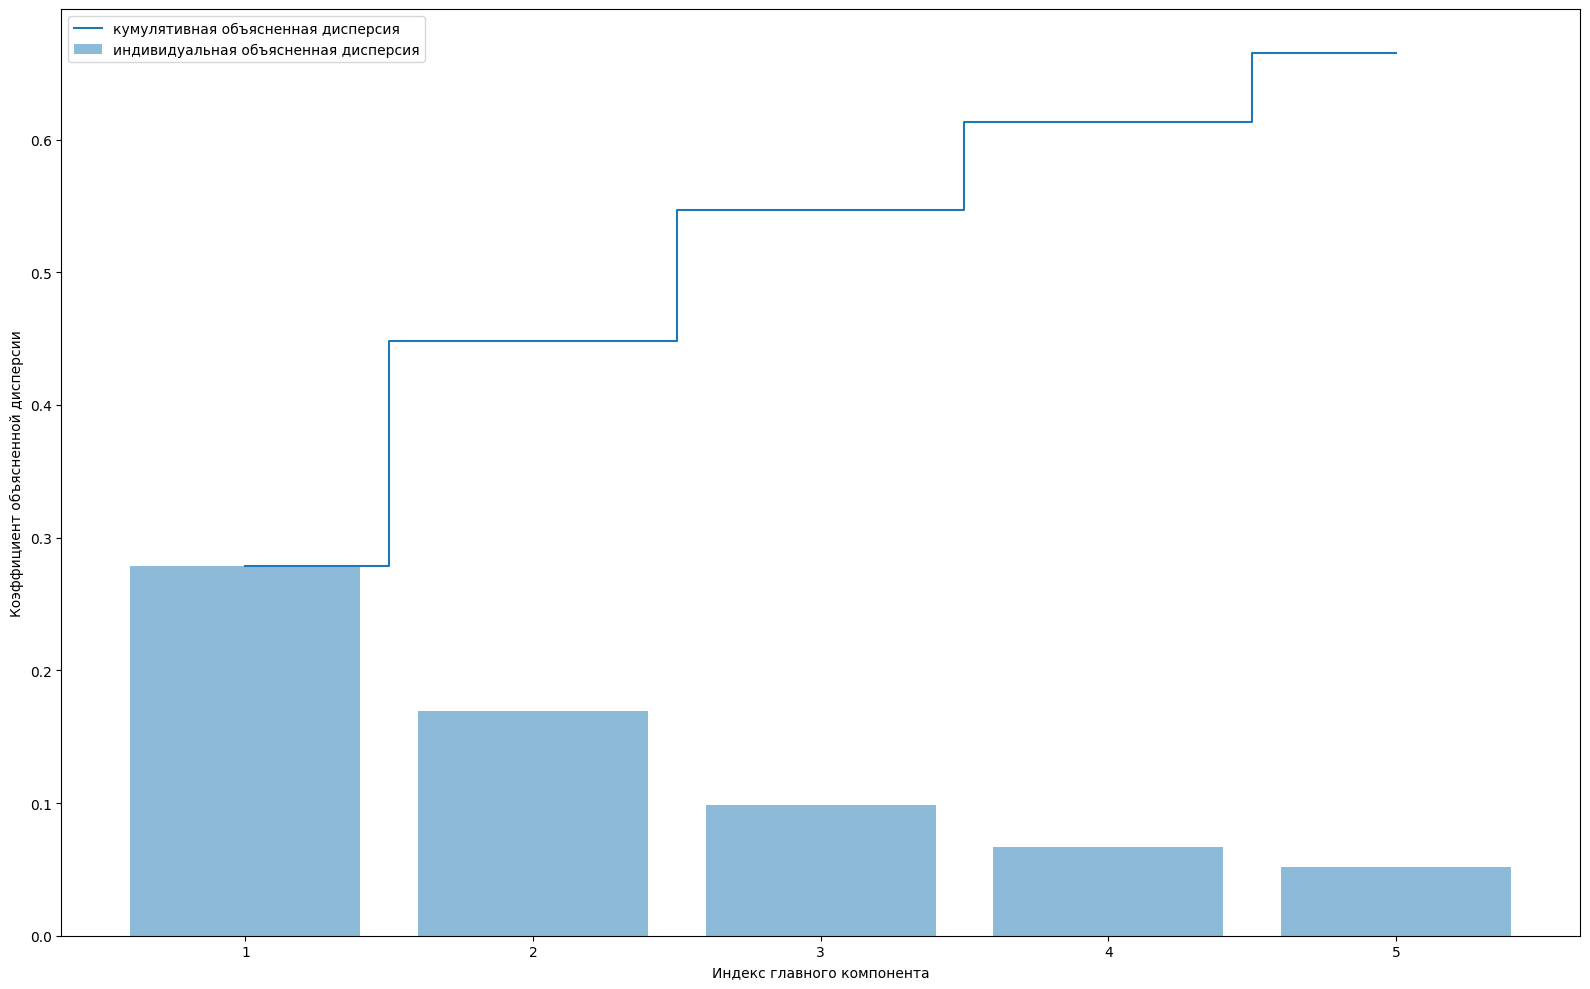

In [634]:
tot = sum(eigen_vals) # Сумма собственных значений
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)] # Доля объяснённой дисперсии
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize = (16, 10))
plt.bar(range(1,6), var_exp[:5], alpha = 0.5, align = 'center', label = 'индивидуальная объясненная дисперсия')
plt.step(range(1,6), cum_var_exp[:5], where ='mid', label = 'кумулятивная объясненная дисперсия')
plt.ylabel('Коэффициент объясненной дисперсии')
plt.xlabel('Индекс главного компонента')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show() 

In [635]:
# Определение числа главных компонент, объясняющих 80% дисперсии
def countPca(eig_vals):
    s = sum(eig_vals)
    tempS = 0
    k = 1
    for val in sorted(eig_vals, reverse = True):
        tempS += val
        print(f'{k}-я главная компонента объясняет {round(val/s*100, 2)}% дисперсии')
        if tempS / s >= 0.8:
            print(f'Первые {k} главные компоненты объясняют {round(tempS / s * 100, 2)}% дисперсии')
            return k
        k += 1

In [636]:
k = countPca(eigen_vals)

1-я главная компонента объясняет 27.87% дисперсии
2-я главная компонента объясняет 16.96% дисперсии
3-я главная компонента объясняет 9.85% дисперсии
4-я главная компонента объясняет 6.68% дисперсии
5-я главная компонента объясняет 5.16% дисперсии
6-я главная компонента объясняет 3.74% дисперсии
7-я главная компонента объясняет 2.58% дисперсии
8-я главная компонента объясняет 2.18% дисперсии
9-я главная компонента объясняет 2.08% дисперсии
10-я главная компонента объясняет 1.92% дисперсии
11-я главная компонента объясняет 1.86% дисперсии
Первые 11 главные компоненты объясняют 80.87% дисперсии


### Сортировка собственных пар в порядке убывания собственных значений

In [637]:
# Cоздать список кортежей (собственное значение, собственный вектор)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# Oтсортировать кортежи (собственное значение, собственный вектор) от высоких к низким
eigen_pairs.sort(key=lambda k: k[0], reverse = True) 
#eigen_pairs

### Соберем 11 собственных векторов, которые соответствуют 11 наибольшим собственным значениям, чтобы захватить около 81% дисперсии в наборе данных

In [638]:
w = np.hstack([eigen_pairs[i][1] [:, np.newaxis] for i in range(k)])

In [639]:
pd.DataFrame(w)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.115158,0.062076,0.041628,-0.034879,0.036539,-0.056827,0.007705,-0.041454,0.103804,-0.006950,-0.009148
1,-0.014613,-0.012500,-0.056568,0.021296,0.030342,0.039671,0.167318,-0.029632,0.098491,0.111544,-0.060913
2,-0.014590,-0.015227,-0.051888,0.022644,-0.005504,0.024933,0.205350,-0.045224,0.094772,0.166399,-0.077473
3,-0.013330,-0.010345,-0.041646,0.022770,-0.030455,0.007029,0.216675,-0.075547,0.063153,0.222351,-0.051290
4,-0.002170,0.013068,-0.041034,0.020344,-0.044884,0.000327,0.202025,-0.092270,0.020200,0.262440,-0.016812
...,...,...,...,...,...,...,...,...,...,...,...
154,-0.072751,-0.126800,0.072298,-0.069944,-0.068796,0.070208,0.073099,0.048747,0.000876,0.038936,-0.027626
155,-0.072357,-0.132831,0.076460,-0.066748,-0.064667,0.071072,0.067525,0.037742,0.005001,0.026688,-0.031158
156,-0.010693,0.008670,-0.012608,0.009474,0.040534,0.076355,0.014416,-0.000889,-0.051661,0.026411,-0.189774
157,-0.007807,0.007195,0.021623,0.014180,0.001238,0.064674,-0.009196,-0.027445,-0.111925,0.024382,-0.187104


## Определение весов, с которыми признаки входят в первые 5 главные компоненты

In [640]:
names = pd.read_csv('Names.csv', header = None)
names

,0,1
0,4LFTX,Лучший (4-слойный) индекс поднятия над поверхн...
1,ABSV_mb_700,Абсолютная завихренность на 700mb (1/сек)
2,ABSV_mb_750,Абсолютная завихренность на 750mb (1/сек)
3,ABSV_mb_800,Абсолютная завихренность на 800mb (1/сек)
4,ABSV_mb_850,Абсолютная завихренность на 850mb (1/сек)
...,...,...
168,VVEL_sig_0995,Вертикальная завихренность на 0.995 сигма-слое...
169,VWSH_pv_p2,Вертикальный сдвиг скорости PV=2e-06(км^2/кг/с...
170,VWSH_tropo,Вертикальный сдвиг скорости в тропопаузе (1/сек)
171,WEASD,Водный эквивалент накопленной толщины снежного...


In [641]:
descr = []
for col in df.columns:
    if col in names[0].values:
        descr.append(names[names[0]==col][1].values[0])

In [642]:
weights = pd.DataFrame(index = df.columns)
weights['Расшифровка'] = descr
for i in range(5):
    weights[f'{i+1} компонента'] = abs(w[:, i]) # Взятие модуля

In [643]:
pd.set_option('display.max_rows', None)

In [644]:
weights.sort_values(by='1 компонента', ascending=False).iloc[:, [0, 1]]

,Расшифровка,1 компонента
TMP_mb_900,Температура на 900mb (К),0.141766
TMP_mb_925,Температура на 925mb (К),0.141658
TMP_mb_850,Температура на 850mb (К),0.141068
TMP_mb_950,Температура на 950mb (К),0.140605
TMP_msl_1829,Температура на 1829 м над уровнем моря (К),0.140383
APTMP,Кажущаяся температура (К),0.140071
TMP_mb_800,Температура на 800mb (К),0.139903
TMP_mb_u30,Температура на 30-0mb над землёй (К),0.138952
TMP_mb_750,Температура на 750mb (К),0.138860
TMP_m_100,Температура на 100м над землёй (K),0.138706


In [645]:
weights.sort_values(by='2 компонента', ascending=False).iloc[:, [0, 2]]

,Расшифровка,2 компонента
USTM,U-компонента движения шторма,0.147073
UGRD_msl_1829,U-компонента ветра на 1829 м над уровнем моря ...,0.144257
UGRD_mb_800,U-компонента ветра на 800mb (м/с),0.144154
UGRD_mb_850,U-компонента ветра на 850mb (м/с),0.143271
UGRD_mb_750,U-компонента ветра на 750mb (м/с),0.141574
UGRD_msl_2743,U-компонента ветра на 2743 м над уровнем моря ...,0.138756
UGRD_pbl,U-компонента ветра на планетарном пограничном ...,0.138751
GUST,Скорость ветра (м/с),0.138180
UGRD_mb_u30,U-компонента ветра на 30-0mb над землёй (м/с),0.137472
UGRD_mb_700,U-компонента ветра на 700mb (м/с),0.137472


In [646]:
weights.sort_values(by='3 компонента', ascending=False).iloc[:, [0, 3]]

,Расшифровка,3 компонента
VGRD_mb_925,V-компонента ветра на 925mb (м/с),0.174804
VGRD_mb_900,V-компонента ветра на 900mb (м/с),0.170918
RH_sig_072_094,Относительная влажность на 0.72-0.94 сигма-сло...,0.170163
VGRD_mb_950,V-компонента ветра на 950mb (м/с),0.168895
RH_mb_850,Относительная влажность на 850mb (%),0.165118
RH_mb_900,Относительная влажность на 900mb (%),0.158005
RH_mb_800,Относительная влажность на 800mb (%),0.155236
VGRD_mb_u30,V-компонента ветра на 30-0mb над землёй (м/с),0.155187
VGRD_mb_975,V-компонента ветра на 975mb (м/с),0.154428
VGRD_m_100,V-компонента ветра на высоте 100 м (м/с),0.150409


In [647]:
weights.sort_values(by='4 компонента', ascending=False).iloc[:, [0, 4]]

,Расшифровка,4 компонента
VGRD_mb_750,V-компонента ветра на 750mb (м/с),0.190357
VGRD_mb_700,V-компонента ветра на 700mb (м/с),0.190048
VGRD_msl_2743,V-компонента ветра на 2743 м над уровнем моря ...,0.188988
VGRD_mb_800,V-компонента ветра на 800mb (м/с),0.184662
VGRD_msl_3658,V-компонента ветра на 3658 м над уровнем моря ...,0.183050
VGRD_msl_1829,V-компонента ветра на 1829 м над уровнем моря ...,0.181061
ABSV_mb_975,Абсолютная завихренность на 975mb (1/сек),0.161560
VGRD_mb_850,V-компонента ветра на 850mb (м/с),0.160857
HGT_mb_850,Геопотенциальная высота на 850mb (гал/мин),0.157271
VGRD_pv_p2,V-компонента ветра при PV=2e-06(км^2/кг/сек) (...,0.155758


In [648]:
weights.sort_values(by='5 компонента', ascending=False).iloc[:, [0, 5]]

,Расшифровка,5 компонента
RH_mb_1000,Относительная влажность на 1000mb (%),0.195508
RH_sig_0995,Относительная влажность на 0.995 сигма-слое (%),0.195501
RH_m_2,Относительная влажность при 2м над землёй (%),0.194448
RH_mb_975,Относительная влажность на 975mb (%),0.193488
RH_mb_u30,Относительная влажность на 30-0mb над землёй (%),0.185474
HINDEX,Индекс Хейнса (числовой),0.178253
RH_atm_sl,Относительная влажность во всей атмосфере (рас...,0.170532
RH_mb_950,Относительная влажность на 950mb (%),0.166730
TOZNE,Общий озон (DU),0.149534
HGT_pv_p2,Геопотенциальная высота при PV=2e-06(км^2/кг/с...,0.146200


In [649]:
pd.reset_option('display.max_rows')

### Трансформируем образец х в подпространство РСА (12 главных компонент), получив х' = xW

In [650]:
X_std[0].dot(w)

array([-5.08503473,  5.91776003,  1.11010005,  2.20671   , -1.01562273,
        2.32899089, -2.82035375,  0.50548906, -0.09934313,  2.33891374,
        3.34587908])

### Подобным образом мы можем трансформировать весь  набор данных в 12 главных компонент, вычислив скалярное произведение матриц X'=XW

In [651]:
X_pca = X_std.dot(w)

In [652]:
X_pca.shape

(6187, 11)

In [653]:
pd.DataFrame(X_pca)

,0,1,2,3,4,5,6,7,8,9,10
0,-5.085035,5.917760,1.110100,2.206710,-1.015623,2.328991,-2.820354,0.505489,-0.099343,2.338914,3.345879
1,-5.080781,5.732258,0.677459,2.083366,-1.072452,2.422963,-1.836631,0.531386,-0.141530,1.833103,3.100738
2,-5.948181,6.977841,-0.366139,1.712132,-2.053883,1.362579,-1.964760,-0.551821,-3.041182,1.502667,0.265054
3,-7.210120,6.000138,-0.438647,0.506323,-2.342964,2.207254,-1.613484,0.530967,-3.291686,0.726477,0.024830
4,-7.973248,5.910122,-2.024046,0.130885,-2.661915,2.435527,-0.965947,0.193038,-3.663437,1.083622,-0.113434
...,...,...,...,...,...,...,...,...,...,...,...
6182,-3.090163,-8.531793,2.820599,-2.264893,-0.704495,-0.210369,1.531016,1.126177,-1.572379,-0.475240,-0.945317
6183,-3.638634,-8.915930,1.099295,-2.049629,-1.131529,0.129019,0.998346,2.426528,-1.233945,-0.735053,-0.859009
6184,-3.108312,-10.305925,3.471382,-1.685025,0.243674,-0.177393,1.464339,1.822383,-0.861618,-1.894546,0.475068
6185,-3.661908,-10.297532,-1.184722,-1.710883,0.498698,-1.231904,-0.203679,-0.371351,-0.820001,-0.126891,0.589738


## Данные PM 2.5

In [654]:
# Данные PM 2.5 Министерство за каждые 6 часов
dfAll = pd.read_csv(f"pm25_m_6h.csv", sep = ';', index_col = ['Date'], parse_dates = ['Date'])

# Размерность массива X меньше размерности значений целевой переменной (до 27 марта 2023), поэтому построим регрессию на меньшей размерности
dfAll = dfAll[:"2023-03-27 12:00:00"] # Срез до конца 2022 года
dfAll.drop(['Березовка', 'Кубеково'], axis = 1, inplace = True)
dfAll

,Черемушки,Кировский,Покровка,Северный,Солнечный,Свердловский,Ветлужанка
Date,,,,,,,
2019-01-01 00:00:00,NaN,NaN,90.16,NaN,NaN,NaN,NaN
2019-01-01 06:00:00,NaN,NaN,67.95,NaN,NaN,NaN,NaN
2019-01-01 12:00:00,NaN,NaN,78.74,NaN,NaN,NaN,NaN
2019-01-01 18:00:00,NaN,NaN,115.53,NaN,NaN,NaN,NaN
2019-01-02 00:00:00,NaN,NaN,61.63,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-03-26 12:00:00,7.74,10.11,3.89,8.47,7.26,7.84,8.21
2023-03-26 18:00:00,9.53,9.89,6.63,5.47,10.68,8.74,9.16
2023-03-27 00:00:00,7.26,7.37,5.11,5.53,7.53,6.47,8.16


In [655]:
# Усреднение данных по всем датчикам
pm = dfAll.mean(axis = 1)
pm

Date
2019-01-01 00:00:00     90.160000
2019-01-01 06:00:00     67.950000
2019-01-01 12:00:00     78.740000
2019-01-01 18:00:00    115.530000
2019-01-02 00:00:00     61.630000
                          ...    
2023-03-26 12:00:00      7.645714
2023-03-26 18:00:00      8.585714
2023-03-27 00:00:00      6.775714
2023-03-27 06:00:00      7.167143
2023-03-27 12:00:00      6.637143
Length: 6187, dtype: float64

In [656]:
# Количество пропусков в данных
pm.isnull().sum()

83

In [657]:
# Добавим колонку pm, чтобы затем удалить пропуски во всех данных
X = pd.DataFrame(X_pca)
X.index = pm.index
X['pm'] = pm.values
X

,0,1,2,3,4,5,6,7,8,9,10,pm
Date,,,,,,,,,,,,
2019-01-01 00:00:00,-5.085035,5.917760,1.110100,2.206710,-1.015623,2.328991,-2.820354,0.505489,-0.099343,2.338914,3.345879,90.160000
2019-01-01 06:00:00,-5.080781,5.732258,0.677459,2.083366,-1.072452,2.422963,-1.836631,0.531386,-0.141530,1.833103,3.100738,67.950000
2019-01-01 12:00:00,-5.948181,6.977841,-0.366139,1.712132,-2.053883,1.362579,-1.964760,-0.551821,-3.041182,1.502667,0.265054,78.740000
2019-01-01 18:00:00,-7.210120,6.000138,-0.438647,0.506323,-2.342964,2.207254,-1.613484,0.530967,-3.291686,0.726477,0.024830,115.530000
2019-01-02 00:00:00,-7.973248,5.910122,-2.024046,0.130885,-2.661915,2.435527,-0.965947,0.193038,-3.663437,1.083622,-0.113434,61.630000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-26 12:00:00,-3.090163,-8.531793,2.820599,-2.264893,-0.704495,-0.210369,1.531016,1.126177,-1.572379,-0.475240,-0.945317,7.645714
2023-03-26 18:00:00,-3.638634,-8.915930,1.099295,-2.049629,-1.131529,0.129019,0.998346,2.426528,-1.233945,-0.735053,-0.859009,8.585714
2023-03-27 00:00:00,-3.108312,-10.305925,3.471382,-1.685025,0.243674,-0.177393,1.464339,1.822383,-0.861618,-1.894546,0.475068,6.775714


In [658]:
# Ячейки, для которых значение pm 2.5 отсутствует 
X[X['pm'].isnull() == True]

,0,1,2,3,4,5,6,7,8,9,10,pm
Date,,,,,,,,,,,,
2019-02-01 18:00:00,-14.511788,7.079205,-3.729164,0.011535,1.135271,2.388981,1.932438,3.454301,-0.222910,-0.266311,2.247743,NaN
2019-02-02 00:00:00,-15.472361,4.812947,-2.853580,-0.319943,0.412630,2.413067,1.597735,2.369712,-1.036971,0.109035,2.297422,NaN
2019-02-02 06:00:00,-14.976940,3.057840,-3.139052,-0.009755,1.666955,2.418378,1.014205,1.554742,-0.971138,-0.130926,2.777495,NaN
2019-02-02 12:00:00,-14.656931,2.739902,-3.674048,1.110424,1.460525,1.925434,1.330344,1.311764,-0.680584,-0.216354,2.766743,NaN
2019-02-02 18:00:00,-13.297465,4.754117,-5.148770,3.533440,2.581416,0.301639,0.483973,1.415284,-0.152174,-1.270345,2.849724,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10 18:00:00,-10.969004,-0.746139,-3.628373,3.775950,3.883617,1.271213,-4.693527,1.930152,1.200732,-2.678470,-0.061379,NaN
2023-01-11 00:00:00,-11.188159,1.114846,-3.341929,5.301818,2.738160,0.301980,-3.536124,-0.186569,-1.177008,-1.280789,-2.814648,NaN
2023-01-11 06:00:00,-12.811967,-1.783476,-3.792786,1.468405,5.436789,3.200511,-3.175743,-0.882877,-1.528020,-0.462527,-3.364581,NaN


In [659]:
# Удаление пропусков
X.dropna(inplace = True)

### Объединение зим (по периодам повышенной концентрации pm 2.5)

In [660]:
win19 = X[:'2019-03-01 00:00:00']
win19_20 = X['2019-11-27 00:00:00':'2020-02-27 00:00:00']
win20_21 = X['2020-11-27 00:00:00':'2021-02-25 00:00:00']
win21_22 = X['2021-12-15 00:00:00':'2022-02-22 00:00:00']
win22_23 = X['2022-12-13 00:00:00' : '2023-02-22 00:00:00']

In [661]:
winters = pd.concat([win19, win19_20, win20_21, win21_22, win22_23])
winters

,0,1,2,3,4,5,6,7,8,9,10,pm
Date,,,,,,,,,,,,
2019-01-01 00:00:00,-5.085035,5.917760,1.110100,2.206710,-1.015623,2.328991,-2.820354,0.505489,-0.099343,2.338914,3.345879,90.160000
2019-01-01 06:00:00,-5.080781,5.732258,0.677459,2.083366,-1.072452,2.422963,-1.836631,0.531386,-0.141530,1.833103,3.100738,67.950000
2019-01-01 12:00:00,-5.948181,6.977841,-0.366139,1.712132,-2.053883,1.362579,-1.964760,-0.551821,-3.041182,1.502667,0.265054,78.740000
2019-01-01 18:00:00,-7.210120,6.000138,-0.438647,0.506323,-2.342964,2.207254,-1.613484,0.530967,-3.291686,0.726477,0.024830,115.530000
2019-01-02 00:00:00,-7.973248,5.910122,-2.024046,0.130885,-2.661915,2.435527,-0.965947,0.193038,-3.663437,1.083622,-0.113434,61.630000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-21 00:00:00,-6.412796,1.889785,-1.993915,2.146988,-0.294588,-0.954164,-1.004535,0.225981,0.850529,-2.533829,2.712505,46.150000
2023-02-21 06:00:00,-3.789231,3.441769,-1.735834,1.141819,0.796862,-0.833323,-0.014095,-0.260038,1.076343,-2.434860,2.789004,44.804286
2023-02-21 12:00:00,-4.236562,4.996891,0.301871,2.558412,-1.472574,-1.855395,-0.168413,0.230731,-0.084040,-1.586433,1.405521,52.810000


### Корреляция главных компонент с PM 2.5

In [662]:
winters.corr()['pm']

0     0.338243
1     0.480257
2     0.272031
3     0.242174
4    -0.113199
5     0.120611
6    -0.228552
7     0.003904
8    -0.009123
9     0.159919
10   -0.027199
pm    1.000000
Name: pm, dtype: float64

# Диаграммы рассеяния

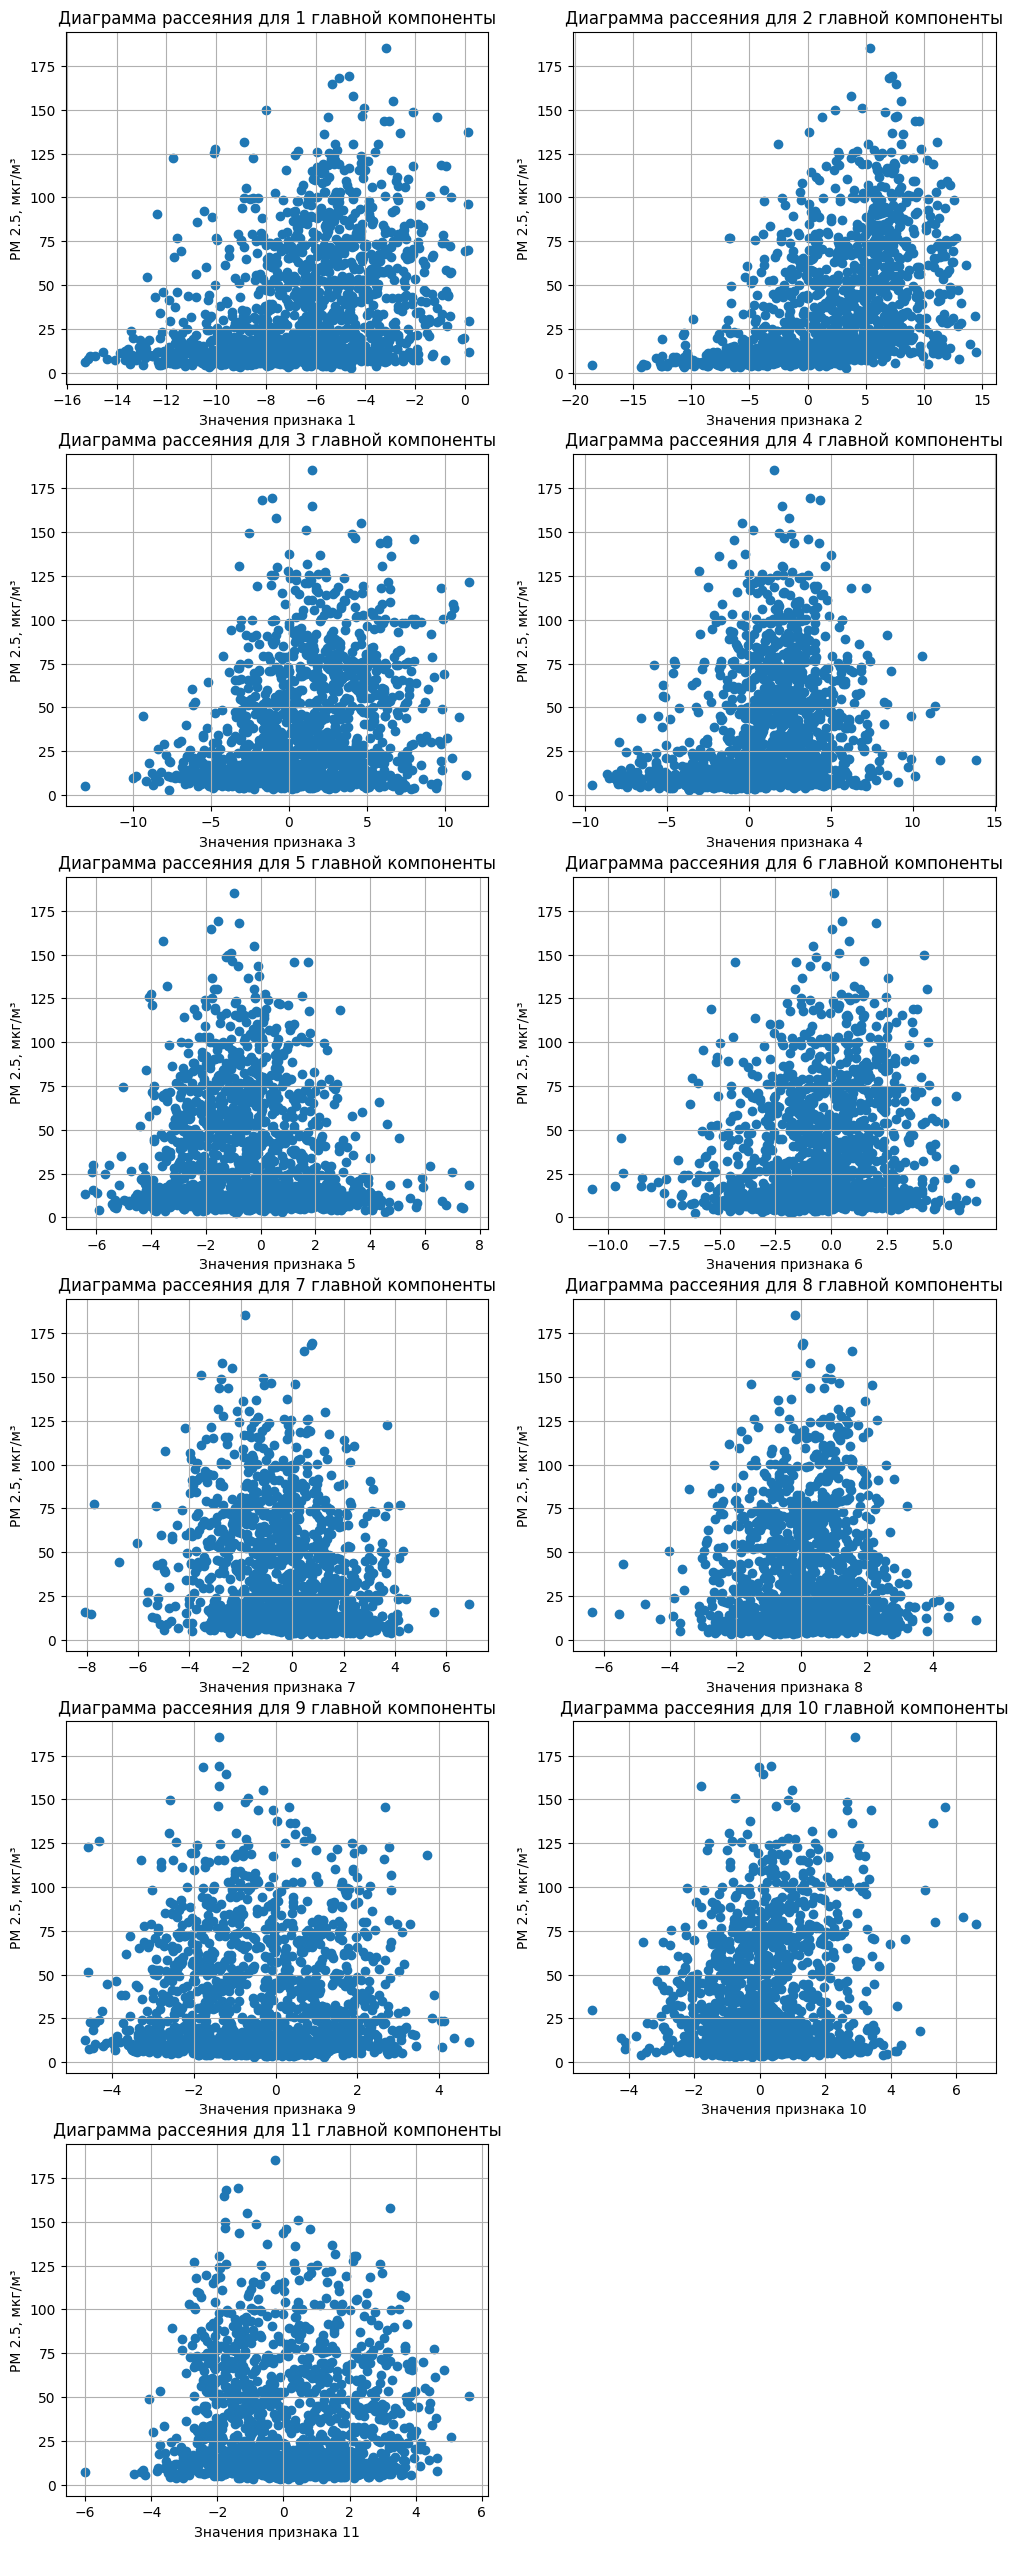

In [663]:
plt.figure(figsize = (12, 32))
for comp in range(k):
    plt.subplot(int(k/2) + k%2, 2, comp+1)
    plt.scatter(winters[comp], winters['pm'])

    plt.xlabel(f'Значения признака {comp+1}')
    plt.ylabel('PM 2.5, мкг/м³')
    plt.title(f'Диаграмма рассеяния для {comp+1} главной компоненты')
    
    plt.grid()

# Линейная регрессия

In [664]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [665]:
# Вычисление метрик
def Metrics(y, y_pred, rnd = 2):
    print('MSE:', round(mean_squared_error(y, y_pred), rnd))
    
    print('MAE:', round(mean_absolute_error(y, y_pred), rnd))
    
    print('R2:', round(r2_score(y, y_pred), rnd))

In [666]:
# Прогнозы линейной регрессии и вычисление ошибок
def PredictAndMetrics(model, X, y, rnd = 2):
    y_pred = model.predict(X)
    
    Metrics(y, y_pred, rnd)
    
    return y_pred

In [667]:
# Применение линейной регрессии с train_twst_split
def LinReg(X, y, ts, modelType = 'linear', alpha = 1.0, l1_ratio = 0.5):
    # Разбиение выборки на тренировочную и тестовую с соотношением 1-ts : ts
    tscv = TimeSeriesSplit(n_splits = 2, test_size = int(len(y) * ts))
    
    for i, (train_index, test_index) in enumerate(tscv.split(X)):
        X_train, X_test = X[train_index, :], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts, random_state = 0)
    
    # Создание и обучение модели
    if modelType == 'linear':
        print('Линейная регрессия')
        model = LinearRegression()
    
    if modelType == 'lasso':
        print('LASSO')
        from sklearn.linear_model import Lasso
        model = Lasso(alpha = alpha)
        
    if modelType == 'ridge':
        print('Ridge')
        from sklearn.linear_model import Ridge
        model = Ridge(alpha = alpha)
        
    if modelType == 'elastic':
        print('Elastic Net')
        from sklearn.linear_model import ElasticNet
        model = ElasticNet(alpha = alpha, l1_ratio = l1_ratio)
    
    
    model.fit(X_train, y_train)
    
    print('Тренировочная выборка:\n')
    PredictAndMetrics(model, X_train, y_train)
    
    print('\nТестовая выборка:\n')
    PredictAndMetrics(model, X_test, y_test)
    
    return model

In [668]:
# Сравнение графиков двух списков значений
def CompareGraph(x, y1, y2, l1, l2, title):
    plt.figure(figsize = (13, 6))
    plt.plot(x, y1, label = l1)
    plt.plot(x, y2, label = l2)

    plt.xlabel('time')
    plt.ylabel('PM 2.5, мкг/м³')
    plt.title(title)
    
    plt.legend()
    plt.grid()

# 11 главных компонент

In [669]:
# Обучаяющая выборка 
begin, end_train = '2019-01-01 00:00:00', '2023-02-19 00:00:00'
train = X[begin : end_train]

# Контрольная выборка
start, end_control = '2023-02-19 00:00:00', '2023-02-22 00:00:00'
control = X[start : end_control]

In [670]:
# Целевая переменная и признаки
y = train['pm'].values
x = train.iloc[:, :-1].values

In [671]:
train.iloc[:, :-1]

,0,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,,
2019-01-01 00:00:00,-5.085035,5.917760,1.110100,2.206710,-1.015623,2.328991,-2.820354,0.505489,-0.099343,2.338914,3.345879
2019-01-01 06:00:00,-5.080781,5.732258,0.677459,2.083366,-1.072452,2.422963,-1.836631,0.531386,-0.141530,1.833103,3.100738
2019-01-01 12:00:00,-5.948181,6.977841,-0.366139,1.712132,-2.053883,1.362579,-1.964760,-0.551821,-3.041182,1.502667,0.265054
2019-01-01 18:00:00,-7.210120,6.000138,-0.438647,0.506323,-2.342964,2.207254,-1.613484,0.530967,-3.291686,0.726477,0.024830
2019-01-02 00:00:00,-7.973248,5.910122,-2.024046,0.130885,-2.661915,2.435527,-0.965947,0.193038,-3.663437,1.083622,-0.113434
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-18 00:00:00,-7.601826,1.602924,-3.876550,-4.410421,-5.338079,-2.977134,-0.081485,-1.301314,-3.958556,0.920047,-0.694807
2023-02-18 06:00:00,-5.856997,2.687043,-1.775486,-2.844466,-4.056084,-1.260538,-1.959421,-0.724414,-4.000012,-1.975637,-0.661763
2023-02-18 12:00:00,-4.962196,4.953396,-1.278639,1.073230,-4.016005,-1.180428,-2.363952,-0.833017,-3.361242,-2.030693,-0.133771


In [672]:
x.shape

(5958, 11)

In [673]:
# Обучение регрессии на усреднённых данных по всем датчикам
model = LinReg(x, y, ts = 0.3)

Линейная регрессия
Тренировочная выборка:

MSE: 345.91
MAE: 11.13
R2: 0.23

Тестовая выборка:

MSE: 445.4
MAE: 13.0
R2: 0.36


### Предсказание на период с 19 по 22 февраля 2023

In [674]:
predictions = PredictAndMetrics(model, control.iloc[:, :-1].values, control['pm'].values)

MSE: 449.25
MAE: 16.34
R2: -0.23


## Экспоненцирование

In [675]:
# Обучение регрессии на усреднённых данных по всем датчикам
model = LinReg(np.exp(x), y, ts = 0.3)

Линейная регрессия
Тренировочная выборка:

MSE: 444.44
MAE: 12.91
R2: 0.01

Тестовая выборка:

MSE: 702.93
MAE: 16.53
R2: -0.01


In [676]:
predictions = PredictAndMetrics(model, np.exp(control.iloc[:, :-1].values), control['pm'].values)

MSE: 955.91
MAE: 25.87
R2: -1.61


## L1 - регуляризация (LASSO)

In [677]:
# Обучение регрессии на усреднённых данных по всем датчикам
model = LinReg(x, y, 0.3, 'lasso')

LASSO
Тренировочная выборка:

MSE: 347.62
MAE: 11.08
R2: 0.22

Тестовая выборка:

MSE: 457.92
MAE: 13.12
R2: 0.34


In [678]:
predictions = PredictAndMetrics(model, control.iloc[:, :-1].values, control['pm'].values)

MSE: 478.17
MAE: 17.27
R2: -0.31


## L2 - регуляризация (Ridge)

In [679]:
# Обучение регрессии на усреднённых данных по всем датчикам
model = LinReg(x, y, 0.3, 'ridge')

Ridge
Тренировочная выборка:

MSE: 345.91
MAE: 11.13
R2: 0.23

Тестовая выборка:

MSE: 445.4
MAE: 13.0
R2: 0.36


In [680]:
predictions = PredictAndMetrics(model, control.iloc[:, :-1].values, control['pm'].values)

MSE: 449.26
MAE: 16.34
R2: -0.23


## Полиномиальная регрессия (степень 2)

In [681]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)
Xquad = quadratic.fit_transform(x)

In [682]:
# Обучение регрессии на усреднённых данных по всем датчикам
model = LinReg(Xquad, y, ts = 0.3)

Линейная регрессия
Тренировочная выборка:

MSE: 284.05
MAE: 10.0
R2: 0.37

Тестовая выборка:

MSE: 364.36
MAE: 12.0
R2: 0.48


In [683]:
Xq_ctr = quadratic.fit_transform(control.iloc[:, :-1].values)
y_ctr = control['pm']

y_pred = model.predict(Xq_ctr)

Metrics(y_ctr, y_pred)

MSE: 373.62
MAE: 16.16
R2: -0.02


## Полиномиальная регрессия (степень 3)

In [684]:
quadratic = PolynomialFeatures(degree=3)
Xquad = quadratic.fit_transform(x)

# Обучение регрессии на усреднённых данных по всем датчикам
model = LinReg(Xquad, y, ts = 0.3)

Линейная регрессия
Тренировочная выборка:

MSE: 242.97
MAE: 9.2
R2: 0.46

Тестовая выборка:

MSE: 352.27
MAE: 11.76
R2: 0.5


In [685]:
Xq_ctr = quadratic.fit_transform(control.iloc[:, :-1].values)
y_ctr = control['pm']

y_pred = model.predict(Xq_ctr)

Metrics(y_ctr, y_pred)

MSE: 366.99
MAE: 15.51
R2: -0.0


# Регрессия на наиболее весомые признаки

In [686]:
X = df.copy()
X.index = pm.index
X['pm'] = pm.values

X.dropna(inplace = True)

In [687]:
# Обучаяющая выборка 
train = X[begin : end_train]

# Контрольная выборка
control = X[start : end_control]

In [688]:
# Целевая переменная и признаки
y = train['pm'].values
x = train.iloc[:, :-1].values

In [689]:
# Обучение регрессии на усреднённых данных по всем датчикам
model = LinReg(x, y, ts = 0.3)

Линейная регрессия
Тренировочная выборка:

MSE: 242.53
MAE: 9.32
R2: 0.46

Тестовая выборка:

MSE: 357.07
MAE: 11.83
R2: 0.49


### Предсказание на период с 19 по 22 февраля 2023

In [690]:
predictions = PredictAndMetrics(model, control.iloc[:, :-1].values, control['pm'].values)

MSE: 268.33
MAE: 13.77
R2: 0.27


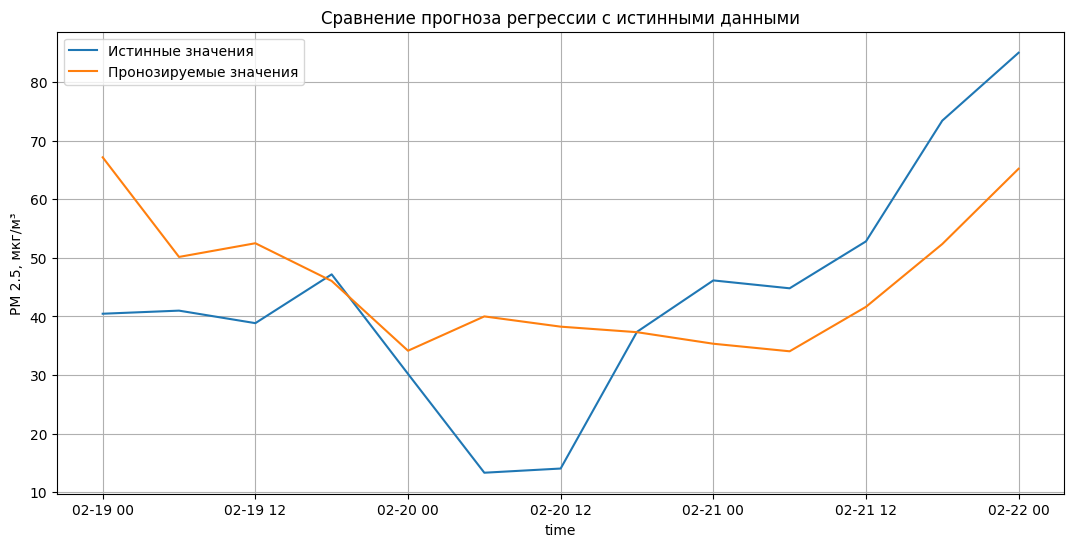

In [691]:
CompareGraph(control.index, control['pm'], predictions, 'Истинные значения', 'Пронозируемые значения', 'Сравнение прогноза регрессии с истинными данными')

## L1 - регуляризация (LASSO)

In [692]:
# Обучение регрессии на усреднённых данных по всем датчикам
model = LinReg(x, y, 0.3, 'lasso')

LASSO
Тренировочная выборка:

MSE: 268.14
MAE: 9.46
R2: 0.4

Тестовая выборка:

MSE: 365.06
MAE: 11.17
R2: 0.48


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.251e+05, tolerance: 1.869e+02
  model = cd_fast.enet_coordinate_descent(


In [693]:
predictions = PredictAndMetrics(model, control.iloc[:, :-1].values, control['pm'].values)

MSE: 312.25
MAE: 14.32
R2: 0.15


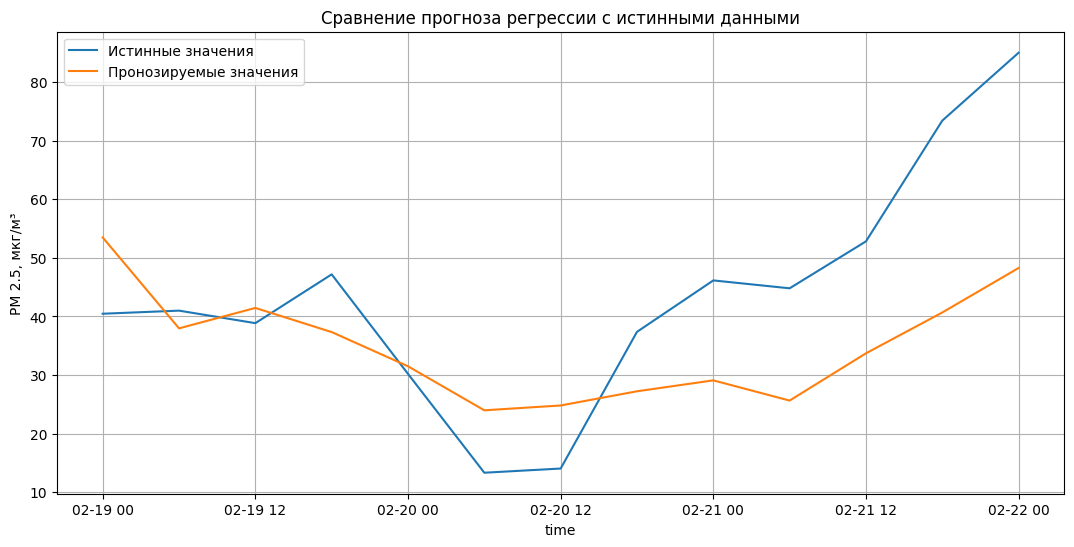

In [694]:
CompareGraph(control.index, control['pm'], predictions, 'Истинные значения', 'Пронозируемые значения', 'Сравнение прогноза регрессии с истинными данными')

## L2 - регуляризация (Ridge)

In [695]:
# Обучение регрессии на усреднённых данных по всем датчикам
model = LinReg(x, y, 0.3, 'ridge')

Ridge
Тренировочная выборка:

MSE: 244.19
MAE: 9.31
R2: 0.46

Тестовая выборка:

MSE: 343.06
MAE: 11.47
R2: 0.51


In [696]:
predictions = PredictAndMetrics(model, control.iloc[:, :-1].values, control['pm'].values)

MSE: 232.95
MAE: 12.66
R2: 0.36


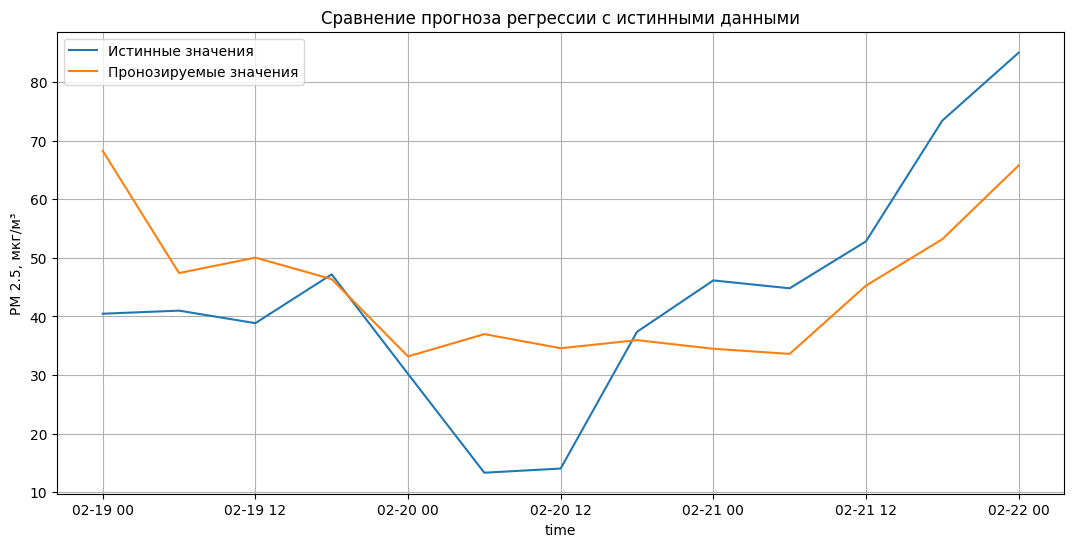

In [697]:
CompareGraph(control.index, control['pm'], predictions, 'Истинные значения', 'Пронозируемые значения', 'Сравнение прогноза регрессии с истинными данными')

## Полиномиальная регрессия (степень 2)

In [698]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)
Xquad = quadratic.fit_transform(x)

In [699]:
# Обучение регрессии на усреднённых данных по всем датчикам
model = LinReg(Xquad, y, ts = 0.3)

Линейная регрессия
Тренировочная выборка:

MSE: 0.0
MAE: 0.0
R2: 1.0

Тестовая выборка:

MSE: 5435.14
MAE: 53.08
R2: -6.79


In [700]:
Xq_ctr = quadratic.fit_transform(control.iloc[:, :-1].values)
y_ctr = control['pm']

y_pred = model.predict(Xq_ctr)

Metrics(y_ctr, y_pred)

MSE: 7919.02
MAE: 65.89
R2: -20.65


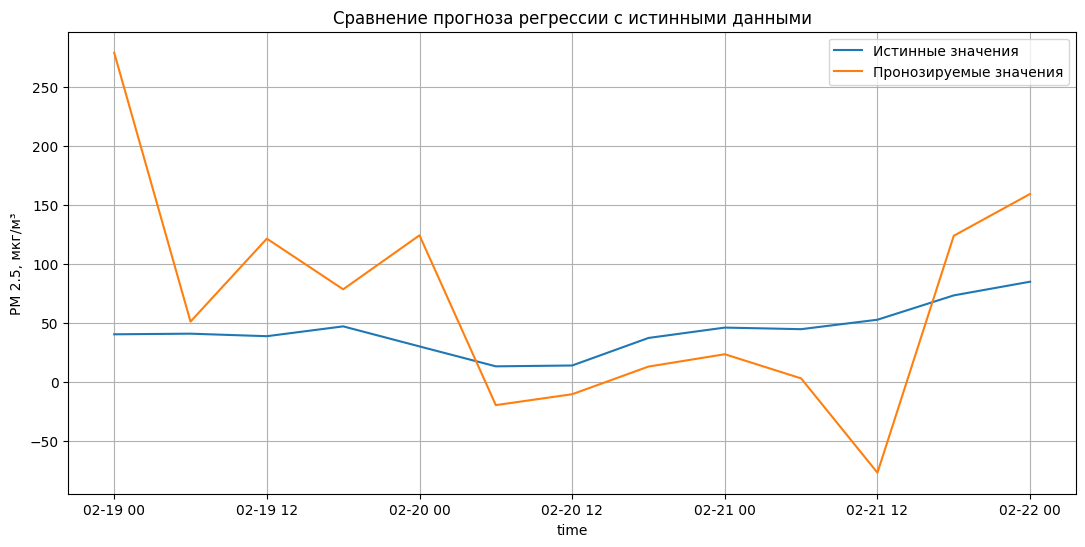

In [701]:
CompareGraph(control.index, control['pm'], y_pred, 'Истинные значения', 'Пронозируемые значения', 'Сравнение прогноза регрессии с истинными данными')

# Регрессия на наиболее весомые признаки

Возьмём по 5 признаков из каждой главной компоненты

In [702]:
weights_k = pd.DataFrame(index = df.columns)
for i in range(k):
    weights_k[f'{i+1} компонента'] = abs(w[:, i]) # Взятие модуля
weights_k

,1 компонента,2 компонента,3 компонента,4 компонента,5 компонента,6 компонента,7 компонента,8 компонента,9 компонента,10 компонента,11 компонента
4LFTX,0.115158,0.062076,0.041628,0.034879,0.036539,0.056827,0.007705,0.041454,0.103804,0.006950,0.009148
ABSV_mb_700,0.014613,0.012500,0.056568,0.021296,0.030342,0.039671,0.167318,0.029632,0.098491,0.111544,0.060913
ABSV_mb_750,0.014590,0.015227,0.051888,0.022644,0.005504,0.024933,0.205350,0.045224,0.094772,0.166399,0.077473
ABSV_mb_800,0.013330,0.010345,0.041646,0.022770,0.030455,0.007029,0.216675,0.075547,0.063153,0.222351,0.051290
ABSV_mb_850,0.002170,0.013068,0.041034,0.020344,0.044884,0.000327,0.202025,0.092270,0.020200,0.262440,0.016812
...,...,...,...,...,...,...,...,...,...,...,...
VVEL_mb_1000,0.072751,0.126800,0.072298,0.069944,0.068796,0.070208,0.073099,0.048747,0.000876,0.038936,0.027626
VVEL_sig_0995,0.072357,0.132831,0.076460,0.066748,0.064667,0.071072,0.067525,0.037742,0.005001,0.026688,0.031158
VWSH_pv_p2,0.010693,0.008670,0.012608,0.009474,0.040534,0.076355,0.014416,0.000889,0.051661,0.026411,0.189774
VWSH_tropo,0.007807,0.007195,0.021623,0.014180,0.001238,0.064674,0.009196,0.027445,0.111925,0.024382,0.187104


In [703]:
nf = 5
features = []
for i in range(k):
    for feat in list(weights_k.sort_values(by=f'{i+1} компонента', ascending=False).iloc[:, [0, 1]].index[:nf]):
        if feat not in features:
            features.append(feat)

features

['TMP_mb_900',
 'TMP_mb_925',
 'TMP_mb_850',
 'TMP_mb_950',
 'TMP_msl_1829',
 'USTM',
 'UGRD_msl_1829',
 'UGRD_mb_800',
 'UGRD_mb_850',
 'UGRD_mb_750',
 'VGRD_mb_925',
 'VGRD_mb_900',
 'RH_sig_072_094',
 'VGRD_mb_950',
 'RH_mb_850',
 'VGRD_mb_750',
 'VGRD_mb_700',
 'VGRD_msl_2743',
 'VGRD_mb_800',
 'VGRD_msl_3658',
 'RH_mb_1000',
 'RH_sig_0995',
 'RH_m_2',
 'RH_mb_975',
 'RH_mb_u30',
 'VSTM',
 'UGRD_pv_p2',
 'UGRD_tropo',
 'UGRD_max_wind',
 'ICAHT_tropo',
 'ABSV_mb_925',
 'VGRD_tropo',
 'VGRD_max_wind',
 'ABSV_mb_800',
 'VGRD_pv_p2',
 'TSOIL_g_10_20',
 'ABSV_mb_950',
 'SOILW_g_10_20',
 'VVEL_mb_800',
 'ICAHT_max_wind',
 'PRES_max_wind',
 'HGT_max_wind',
 'SOILW_g_04_10',
 'VVEL_mb_850',
 'ABSV_mb_850',
 'VVEL_mb_750',
 'VWSH_pv_p2']

In [704]:
# Добавим колонку pm, чтобы затем удалить пропуски во всех данных
X = df[features].copy()
X.index = pm.index
X['pm'] = pm.values
X

,TMP_mb_900,TMP_mb_925,TMP_mb_850,TMP_mb_950,TMP_msl_1829,USTM,UGRD_msl_1829,UGRD_mb_800,UGRD_mb_850,UGRD_mb_750,...,VVEL_mb_800,ICAHT_max_wind,PRES_max_wind,HGT_max_wind,SOILW_g_04_10,VVEL_mb_850,ABSV_mb_850,VVEL_mb_750,VWSH_pv_p2,pm
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,-12.946142,-12.063543,-14.457525,-12.374060,-15.498251,8.077595,3.498280,3.520068,2.737788,2.797422,...,-0.141502,8953.7270,30953.7940,8638.79525,0.322047,-0.178694,0.000088,-0.133528,-0.004168,90.160000
2019-01-01 06:00:00,-13.298086,-12.644171,-14.805853,-13.019018,-15.866217,7.475469,2.721103,2.591348,2.961383,2.212627,...,-0.075533,8859.1115,31392.1195,8520.25700,0.322047,-0.050335,0.000118,-0.173502,-0.004137,67.950000
2019-01-01 12:00:00,-13.742544,-12.943472,-15.410986,-13.115027,-16.515722,7.174831,1.883442,1.845071,1.944823,2.003743,...,-0.189864,15702.2830,10781.8565,15211.48300,0.322047,-0.260287,0.000118,-0.123250,-0.003280,78.740000
2019-01-01 18:00:00,-14.520437,-13.374700,-16.605108,-13.351614,-17.964941,0.243110,4.070930,3.699812,4.460962,1.105727,...,0.066800,15702.2360,10781.7990,15209.26900,0.322047,-0.042648,0.000080,-0.098142,-0.004273,115.530000
2019-01-02 00:00:00,-15.342352,-14.539312,-17.023916,-14.103323,-18.188910,-0.246187,3.450810,3.023442,3.998834,0.987996,...,0.010396,15702.0750,10782.3065,15208.57550,0.322547,-0.085195,0.000135,-0.064814,-0.001644,61.630000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-26 12:00:00,2.373498,3.566385,-0.669073,5.026422,-3.035010,11.156899,18.765456,18.530427,20.218445,17.600334,...,-0.014596,10777.9810,23435.3955,10486.89600,0.247908,0.287576,0.000079,-0.310787,0.009501,7.645714
2023-03-26 18:00:00,1.077463,2.162866,0.224039,3.667841,-2.443869,10.706221,19.733913,19.661252,20.992925,19.917413,...,-0.068945,10731.5020,23607.2425,10433.51000,0.247908,0.249867,0.000075,-0.120996,-0.000707,8.585714
2023-03-27 00:00:00,2.103830,3.313821,-0.446204,4.641184,-2.832007,14.521579,21.484045,21.467747,20.898701,21.694963,...,0.068844,9749.1685,27467.4690,9501.16450,0.247908,0.668853,0.000035,-0.147209,-0.005403,6.775714


In [705]:
# Удаление пропусков
X.dropna(inplace = True)

In [706]:
# Обучаяющая выборка 
train = X[begin : end_train]

# Контрольная выборка
control = X[start : end_control]

In [707]:
# Целевая переменная и признаки
y = train['pm'].values
x = train.iloc[:, :-1].values

In [708]:
# Обучение регрессии на усреднённых данных по всем датчикам
model = LinReg(x, y, ts = 0.3)

Линейная регрессия
Тренировочная выборка:

MSE: 310.75
MAE: 10.58
R2: 0.31

Тестовая выборка:

MSE: 451.01
MAE: 12.72
R2: 0.35


In [709]:
predictions = PredictAndMetrics(model, control.iloc[:, :-1].values, control['pm'].values)

MSE: 590.77
MAE: 18.92
R2: -0.62


### Возьмём по 5 признаков из первых 5 гл. компонент

In [710]:
nf = 5
nc = 5
features = []
for i in range(nc):
    for feat in list(weights_k.sort_values(by=f'{i+1} компонента', ascending=False).iloc[:, [0, 1]].index[:nf]):
        if feat not in features:
            features.append(feat)

features

['TMP_mb_900',
 'TMP_mb_925',
 'TMP_mb_850',
 'TMP_mb_950',
 'TMP_msl_1829',
 'USTM',
 'UGRD_msl_1829',
 'UGRD_mb_800',
 'UGRD_mb_850',
 'UGRD_mb_750',
 'VGRD_mb_925',
 'VGRD_mb_900',
 'RH_sig_072_094',
 'VGRD_mb_950',
 'RH_mb_850',
 'VGRD_mb_750',
 'VGRD_mb_700',
 'VGRD_msl_2743',
 'VGRD_mb_800',
 'VGRD_msl_3658',
 'RH_mb_1000',
 'RH_sig_0995',
 'RH_m_2',
 'RH_mb_975',
 'RH_mb_u30']

In [711]:
# Добавим колонку pm, чтобы затем удалить пропуски во всех данных
X = df[features].copy()
X.index = pm.index
X['pm'] = pm.values
X

,TMP_mb_900,TMP_mb_925,TMP_mb_850,TMP_mb_950,TMP_msl_1829,USTM,UGRD_msl_1829,UGRD_mb_800,UGRD_mb_850,UGRD_mb_750,...,VGRD_mb_700,VGRD_msl_2743,VGRD_mb_800,VGRD_msl_3658,RH_mb_1000,RH_sig_0995,RH_m_2,RH_mb_975,RH_mb_u30,pm
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,-12.946142,-12.063543,-14.457525,-12.374060,-15.498251,8.077595,3.498280,3.520068,2.737788,2.797422,...,4.538462,3.063874,1.448147,8.017608,79.700000,79.000000,87.600003,75.200000,76.000000,90.160000
2019-01-01 06:00:00,-13.298086,-12.644171,-14.805853,-13.019018,-15.866217,7.475469,2.721103,2.591348,2.961383,2.212627,...,1.069844,0.501020,0.643322,4.138774,82.250000,82.000000,87.750000,79.650002,79.500000,67.950000
2019-01-01 12:00:00,-13.742544,-12.943472,-15.410986,-13.115027,-16.515722,7.174831,1.883442,1.845071,1.944823,2.003743,...,-1.045430,-1.044253,-1.529707,0.929126,85.250000,85.000000,91.250002,84.650002,84.500000,78.740000
2019-01-01 18:00:00,-14.520437,-13.374700,-16.605108,-13.351614,-17.964941,0.243110,4.070930,3.699812,4.460962,1.105727,...,-2.791770,-2.526674,-1.679853,-3.399382,88.500000,88.500000,92.376563,88.800003,88.000000,115.530000
2019-01-02 00:00:00,-15.342352,-14.539312,-17.023916,-14.103323,-18.188910,-0.246187,3.450810,3.023442,3.998834,0.987996,...,-3.806472,-3.449917,-3.025850,-6.072056,90.550000,90.500000,93.661890,91.550000,90.500000,61.630000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-26 12:00:00,2.373498,3.566385,-0.669073,5.026422,-3.035010,11.156899,18.765456,18.530427,20.218445,17.600334,...,-1.994374,-1.465808,-1.130561,-4.087266,70.850000,67.950005,74.050000,69.850000,69.100000,7.645714
2023-03-26 18:00:00,1.077463,2.162866,0.224039,3.667841,-2.443869,10.706221,19.733913,19.661252,20.992925,19.917413,...,-0.720342,-0.412676,0.042906,-0.781063,75.750002,73.800000,78.450000,75.200000,76.150002,8.585714
2023-03-27 00:00:00,2.103830,3.313821,-0.446204,4.641184,-2.832007,14.521579,21.484045,21.467747,20.898701,21.694963,...,1.359946,0.566240,-1.372444,2.793372,63.800001,60.200000,68.000000,63.050000,59.900001,6.775714


In [712]:
# Удаление пропусков
X.dropna(inplace = True)

In [713]:
# Обучаяющая выборка 
train = X[begin : end_train]

# Контрольная выборка
control = X[start : end_control]

In [714]:
# Целевая переменная и признаки
y = train['pm'].values
x = train.iloc[:, :-1].values

In [715]:
# Обучение регрессии на усреднённых данных по всем датчикам
model = LinReg(x, y, ts = 0.3)

Линейная регрессия
Тренировочная выборка:

MSE: 327.62
MAE: 10.74
R2: 0.27

Тестовая выборка:

MSE: 488.03
MAE: 12.8
R2: 0.3


In [716]:
predictions = PredictAndMetrics(model, control.iloc[:, :-1].values, control['pm'].values)

MSE: 732.49
MAE: 22.24
R2: -1.0
